## Data Preprocessing

In [167]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [31]:
# Importing the dataset
df = pd.read_csv('data.csv')

In [32]:
df

,ActualPower,Max Capacity,Location 1,Location 2,Location 4,Location 5
0,3.724,45.0,5.5,9.138,9.828,7.346
1,3.424,45.0,4.9,9.038,9.736,7.594
2,3.994,45.0,4.3,8.977,9.613,7.712
3,6.813,45.0,4.0,8.921,9.446,7.731
4,7.737,45.0,5.1,8.811,9.244,7.716
...,...,...,...,...,...,...
333,25.258,45.0,7.2,6.706,6.862,3.250
334,21.316,45.0,8.3,6.776,6.900,3.072
335,18.691,45.0,7.5,6.675,6.891,3.056
336,20.694,45.0,7.6,6.431,6.841,3.189


In [33]:
df.describe()

,ActualPower,Max Capacity,Location 1,Location 2,Location 4,Location 5
count,338.000000,338.000000,337.000000,336.000000,338.000000,337.000000
mean,20.042633,44.729290,7.918694,9.539271,9.412246,6.669478
std,13.184409,0.577727,3.078309,4.217089,4.085693,2.780405
min,0.039000,43.500000,0.400000,0.495000,0.458000,0.481000
25%,6.807000,45.000000,5.500000,6.219500,6.496500,4.661000
50%,23.230000,45.000000,7.800000,9.088000,9.031500,6.556000
75%,31.861000,45.000000,10.400000,12.577250,12.258000,8.229000
max,41.163000,45.000000,16.200000,17.922000,17.665000,12.354000


In [34]:
# Let's check how much the data are spread out from the mean.
mean_ActualPower = np.mean(df['ActualPower'], axis=0)
sd_ActualPower = np.std(df['ActualPower'], axis=0)

mean_MaxCapacity = np.mean(df['Max Capacity'], axis=0)
sd_MaxCapacity = np.std(df['Max Capacity'], axis=0)

mean_Location1 = np.mean(df['Location 1'], axis=0)
sd_Location1 = np.std(df['Location 1'], axis=0)

mean_Location2 = np.mean(df['Location 2'], axis=0)
sd_Location2 = np.std(df['Location 2'], axis=0)

mean_Location4 = np.mean(df['Location 4'], axis=0)
sd_Location4 = np.std(df['Location 4'], axis=0)

mean_Location5 = np.mean(df['Location 5'], axis=0)
sd_Location5 = np.std(df['Location 5'], axis=0)

counter_actual_power = 0
counter_maxcapacity = 0
counter_loc1 = 0
counter_loc2 = 0
counter_loc4 = 0
counter_loc5 = 0

for actual_power, maxcapacity, loc1, loc2, loc4, loc5 in zip(df['ActualPower'], df['Max Capacity'], df['Location 1'], df['Location 2'], df['Location 4'], df['Location 5']):
    if not mean_ActualPower - 3*sd_ActualPower <= actual_power <= mean_ActualPower + 3*sd_ActualPower:
        counter_actual_power += 1
    if not mean_MaxCapacity - 3*sd_MaxCapacity <= maxcapacity <= mean_MaxCapacity + 3*sd_MaxCapacity:
        counter_maxcapacity += 1
    if not mean_Location1 - 3*sd_Location1 <= counter_loc1 <= mean_Location1 + 3*sd_Location1:
        counter_loc1 += 1
    if not mean_Location2 - 3*sd_Location2 <= counter_loc2 <= mean_Location2 + 3*sd_Location2:
        counter_loc2 += 1
    if not mean_Location4 - 3*sd_Location4 <= counter_loc4 <= mean_Location4 + 3*sd_Location4:
        counter_loc4 += 1
    if not mean_Location5 - 3*sd_Location5 <= counter_loc5 <= mean_Location5 + 3*sd_Location5:
        counter_loc5 += 1

counter_dicts = {'counter_actual_power': counter_actual_power,
                'counter_maxcapacity': counter_maxcapacity,
                'counter_loc1': counter_loc1,
                'counter_loc2': counter_loc2,
                'counter_loc4': counter_loc4,
                'counter_loc5': counter_loc5}
print(counter_dicts)

{'counter_actual_power': 0, 'counter_maxcapacity': 0, 'counter_loc1': 0, 'counter_loc2': 0, 'counter_loc4': 0, 'counter_loc5': 0}


#### Как мы видим, ни для одной из переменных нет значений которые меньше, чем mean - 3 * std.

#### Построим гистограммы для того, чтобы посмотреть, как распределяется каждая переменная.

<AxesSubplot:ylabel='Frequency'>

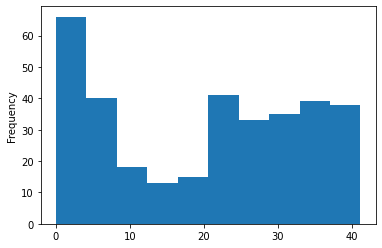

In [12]:
# ActualPower distribution
df['ActualPower'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

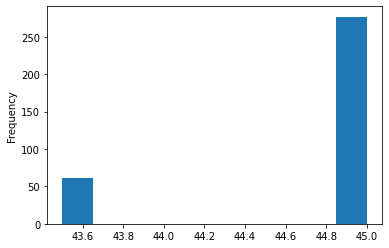

In [13]:
# Max Capacity distribution
df['Max Capacity'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

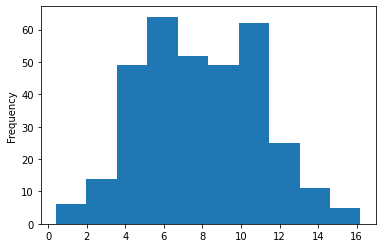

In [14]:
# Location 1 distribution
df['Location 1'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

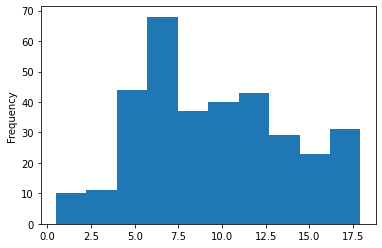

In [15]:
# Location 2 distribution
df['Location 2'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

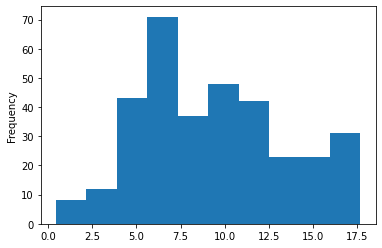

In [16]:
# Location 4 distribution
df['Location 4'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

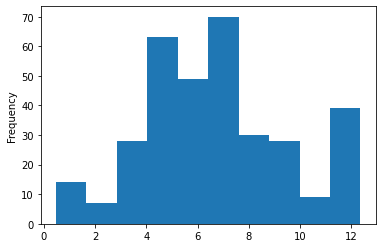

In [17]:
# Location 5 distribution
df['Location 5'].plot(kind = 'hist')

#### Так как все данные являются относительно симметричными мы не будем использовать логарифмирование.

#### Проверим пропущенные данные в колонках.

In [35]:
df.isnull().sum()
# Таким образом мы имеем пропущенные значения в таких колонках:

ActualPower     0
Max Capacity    0
Location 1      1
Location 2      2
Location 4      0
Location 5      1
dtype: int64

#### Избавимся от пропущенных данных в колонках путем их замены на среднее значение в колонке.

In [36]:
#Deal with missing data
#numeric
df[['Location 1']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 1']]).round()
df[['Location 2']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 2']]).round()
df[['Location 5']] = SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 5']]).round()

In [37]:
df.isnull().sum()

ActualPower     0
Max Capacity    0
Location 1      0
Location 2      0
Location 4      0
Location 5      0
dtype: int64

## Linear Regression

In [38]:
# Cheking correlations
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,ActualPower,Max Capacity,Location 1,Location 2,Location 4,Location 5
ActualPower,1.000000,-0.099136,0.297014,0.268269,0.256173,0.113401
Max Capacity,-0.099136,1.000000,-0.429784,-0.429683,-0.422071,-0.398832
Location 1,0.297014,-0.429784,1.000000,0.639311,0.648041,0.580977
Location 2,0.268269,-0.429683,0.639311,1.000000,0.992052,0.911672
Location 4,0.256173,-0.422071,0.648041,0.992052,1.000000,0.937005
Location 5,0.113401,-0.398832,0.580977,0.911672,0.937005,1.000000


#### Как мы видим, корреляция с у(ActualPower) дл всех переменных не прывышает 0.3. Зависимость с Max Capacity - обратная.

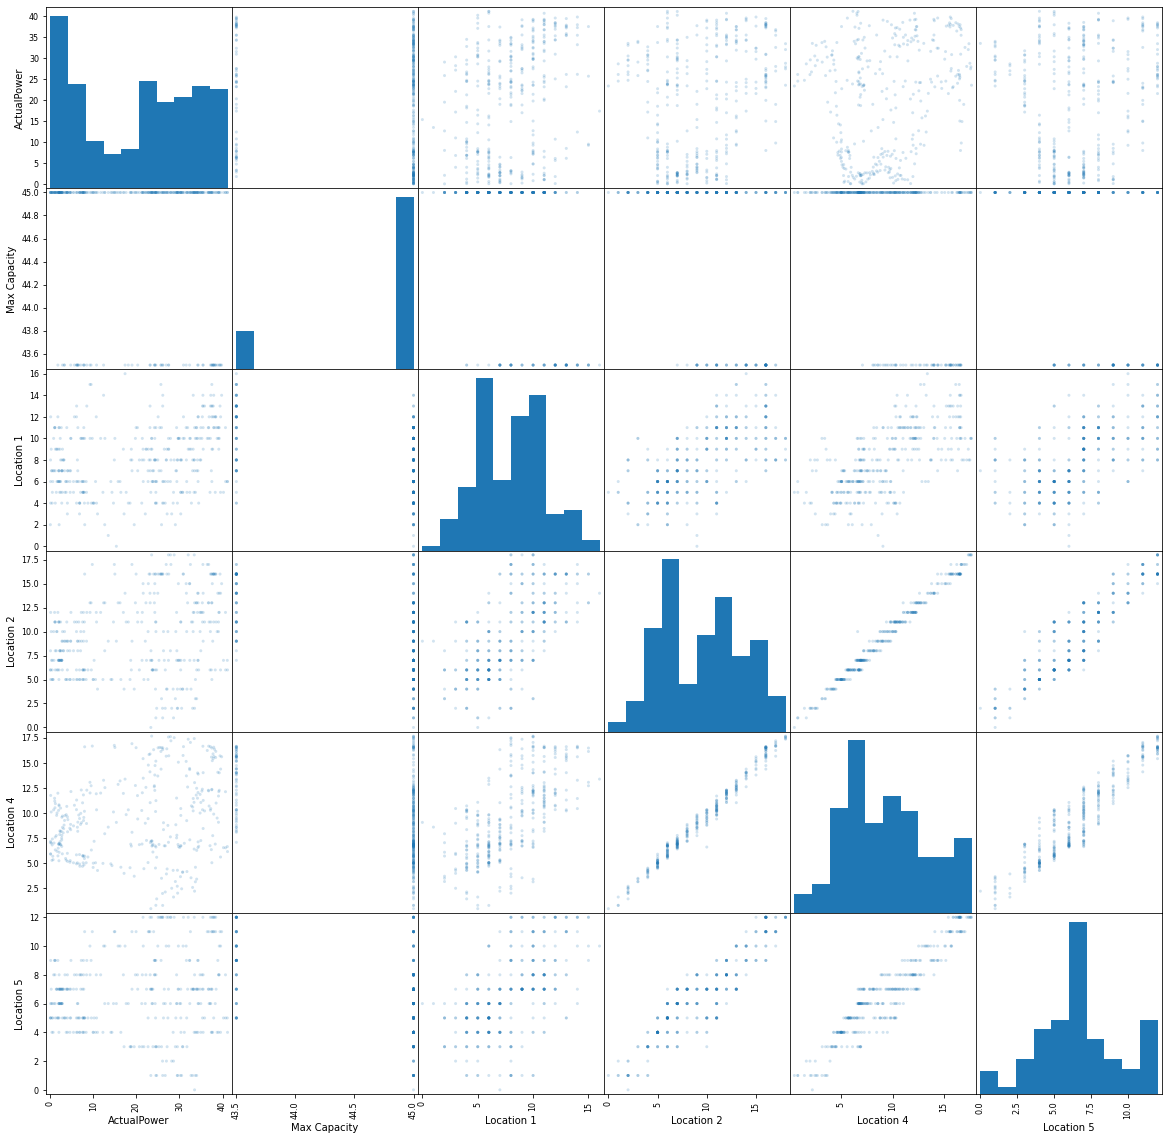

In [39]:
scatter_matrix(df, alpha=0.2, figsize=(20, 20))
plt.show()

### Simple Linear Regression

#### Построим линейную регрессию с Location 1 в качестве Х (так как наиболее высокое значение корреляции - 0,297).

In [40]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:6].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [41]:
# Fitting Simple Linear Regression to the Training set (Location 1)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 1:2], y_train)

In [42]:
# Getting parameters
sr.coef_, sr.intercept_

(array([1.15783522]), 10.495204358568708)

In [43]:
# Predicting the Test set results
y_pred = sr.predict(X_test[:, 1:2])

In [44]:
# Coefficient of determination R^2
sr.score(X_train[:, 1:2], y_train), sr.score(X_test[:, 1:2], y_test)

(0.07261775301646012, 0.1219538083093914)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [45]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 1:2])), mean_squared_error(y_test, y_pred)

(162.24736726069074, 142.79267630376148)

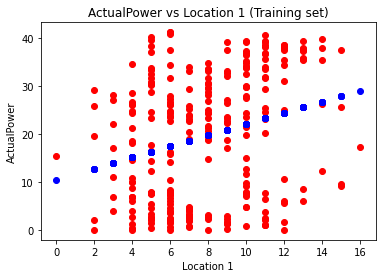

In [46]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], sr.predict(X_train[:, 1:2]), 'bo')
plt.title('ActualPower vs Location 1 (Training set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

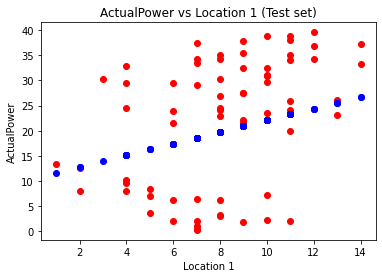

In [47]:
# Visualising the Test set results
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], sr.predict(X_test[:, 1:2]), 'bo')
plt.title('ActualPower vs Location 1 (Test set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

### Multiple Linear Regression

А теперь попробуем построить линейную регрессию используя все переменные.

In [48]:
# Fitting Multiple Linear Regression to the Training set
mr = LinearRegression().fit(X_train, y_train)

In [49]:
# Getting parameters
mr.coef_, mr.intercept_

(array([ 0.75281641,  0.76395725, -1.03390464,  4.474406  , -4.61467652]),
 -21.33907698323824)

In [50]:
# Predicting the Test set results
y_pred = mr.predict(X_test)

In [51]:
# Coefficient of determination R^2
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.17953060354674233, 0.3550212373146102)

По сравнению с линейной регрессией одной переменной (0.07261775301646012, 0.1219538083093914) показатели R^2 улучились, но незначительно.
Модель всё еще не пригодна для прогноза.

In [52]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(143.54275157358248, 104.88997566928406)

In [53]:
# p-values
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
mr1.pvalues

array([7.54687317e-01, 6.15698513e-01, 2.52691593e-02, 4.92236208e-01,
       1.53921880e-02, 1.20044195e-07])

In [54]:
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     11.55
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           4.20e-10
Time:                        22:08:08   Log-Likelihood:                -1053.6
No. Observations:                 270   AIC:                             2119.
Df Residuals:                     264   BIC:                             2141.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.3391     68.222     -0.313      0.755    -155.667     112.989
x1             0.7528      1.498      0.503      0.616      -2.197       3.702
x2             0.7640      0.340      2.250      0.025       0.095       1.432
x3            -1.0339      1.503     -0.688      0.492      -3.994       1.926
x4             4.4744      1.835      2.439      0.015       0.862       8.087
x5            -4.6147      0.848     -5.442      0.000      -6.284      -2.945
==============================================================================
Omnibus:                       84.474   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.922
Skew:                           0.037   Prob(JB):                     0.000948
Kurtosis:                       1.890   Cond. No.                     4.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

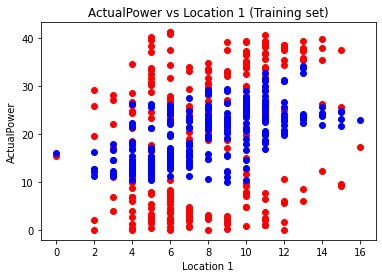

In [55]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], mr.predict(X_train), 'bo')
plt.title('ActualPower vs Location 1 (Training set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

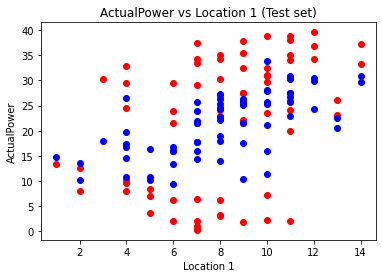

In [56]:
# Visualising the Test set results
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], mr.predict(X_test), 'bo')
plt.title('ActualPower vs Location 1 (Test set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

#### Polynomial Regression

Построим полиномиальную регрессию.

In [57]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 1:2])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 1:2])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [58]:
# Getting parameters
pr.coef_, pr.intercept_

(array([0.58821149, 0.03456267]), 12.509313919229896)

In [59]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

In [60]:
# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.07342643910197744, 0.12402707185119399)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [61]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(162.10588602278446, 142.45551084183177)

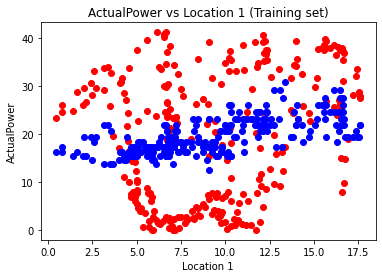

In [64]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 1 (Training set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

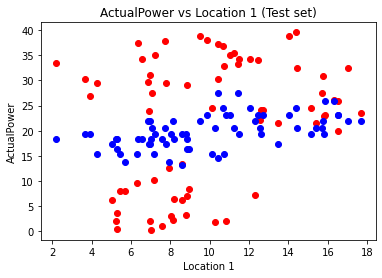

In [65]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 1 (Test set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

Попробуем сделать полиномиальную модель с другими переменными.

In [73]:
# MAX CAPACITY
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 0:1])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 0:1])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [74]:
# Getting parameters
pr.coef_, pr.intercept_

(array([-0.00032473, -0.02873888]), 77.10044660556888)

In [75]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.012361222860595933, -0.0338804583810739)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [76]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(172.78936696992918, 168.13529746782712)

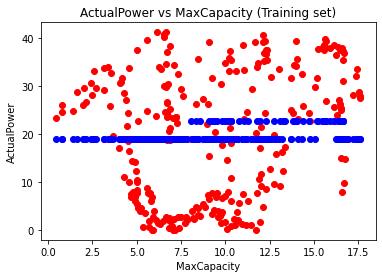

In [77]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs MaxCapacity (Training set)')
plt.xlabel('MaxCapacity')
plt.ylabel('ActualPower')
plt.show()

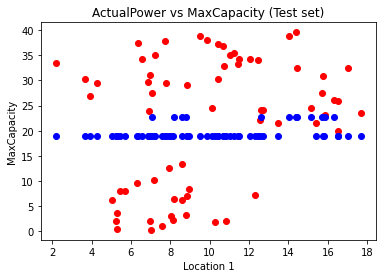

In [78]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs MaxCapacity (Test set)')
plt.xlabel('Location 1')
plt.ylabel('MaxCapacity')
plt.show()

In [79]:
# LOCATION 2
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 2:3])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 2:3])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [80]:
# Getting parameters
pr.coef_, pr.intercept_

(array([-3.85682488,  0.23630194]), 30.72004195498317)

In [81]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.17625737552997145, 0.024673215332501774)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [82]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(144.11540932058205, 158.61297864667245)

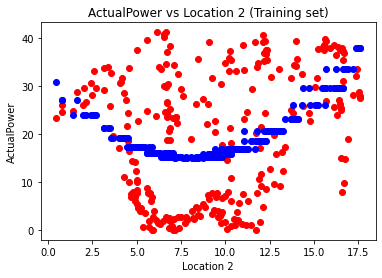

In [83]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

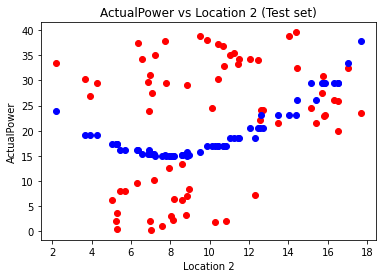

In [84]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [85]:
# LOCATION 4
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 3:4])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 3:4])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [86]:
# Getting parameters
pr.coef_, pr.intercept_

(array([-3.84259169,  0.23530189]), 30.95737843574838)

In [87]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.16480169578227877, -0.003747635541274441)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [88]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(146.11960326034134, 163.2349329327934)

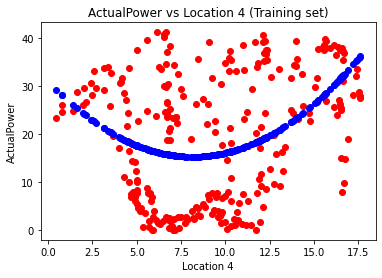

In [89]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 4 (Training set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

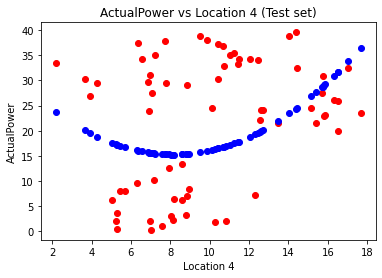

In [90]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 4 (Test set)')
plt.xlabel('Location 4')
plt.ylabel('ActualPower')
plt.show()

In [91]:
# LOCATION 5
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train[:, 4:5])
X_test_p = PolynomialFeatures().fit_transform(X_test[:, 4:5])
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [92]:
# Getting parameters
pr.coef_, pr.intercept_

(array([-6.49270161,  0.5152008 ]), 35.85567252373448)

In [93]:
# Predicting the Test set results
y_pred = pr.predict(X_test_p[:,1:])

# Coefficient of determination R^2
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.1544670383225134, -0.03977764398497907)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [94]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(147.92767212282166, 169.0943300597461)

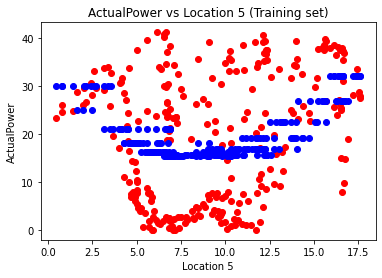

In [95]:
# Visualising the Training set results
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], pr.predict(X_train_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 5 (Training set)')
plt.xlabel('Location 5')
plt.ylabel('ActualPower')
plt.show()

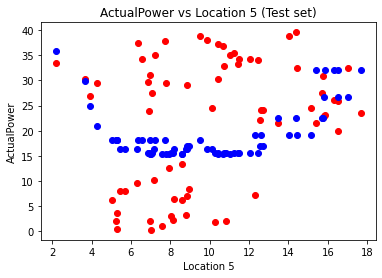

In [96]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('ActualPower vs Location 5 (Test set)')
plt.xlabel('Location 5')
plt.ylabel('ActualPower')
plt.show()

### Backward Elimination with p-values

In [109]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL = 0.05
X_opt = X_train[:, [0, 1, 2, 3, 4]]
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [110]:
X_Modeled

array([[45.   ,  7.   ,  7.503,  6.   ],
       [45.   ,  5.   ,  9.834,  6.   ],
       [45.   ,  6.   ,  6.843,  6.   ],
       ...,
       [45.   ,  3.   ,  5.852,  5.   ],
       [45.   ,  6.   ,  6.647,  5.   ],
       [43.5  ,  8.   , 15.66 , 10.   ]])

In [111]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr = LinearRegression().fit(X_train[:, 0:4], y_train)

In [112]:
# Getting parameters
omr.coef_, omr.intercept_

(array([ 1.28408405,  0.93917498,  2.0397665 , -1.69107672]),
 -48.63860838043068)

In [113]:
# Predicting the Test set results
y_pred = omr.predict(X_test[:, 0:4])

In [114]:
# Coefficient of determination R^2
omr.score(X_train[:, 0:4], y_train), omr.score(X_test[:, 0:4], y_test)

(0.08747648526264218, 0.18300492954558778)

Исходя из R^2 делаем вывод, что модель неадеватна и ее нельзя использовать для прогнозирования.

In [115]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, omr.predict(X_train[:, 0:4])), mean_squared_error(y_test, y_pred)

(159.64780252283202, 132.86420890060958)

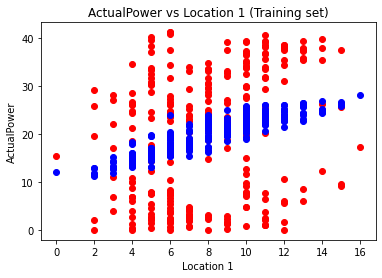

In [116]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], omr.predict(X_train[:, 0:4]), 'bo')
plt.title('ActualPower vs Location 1 (Training set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

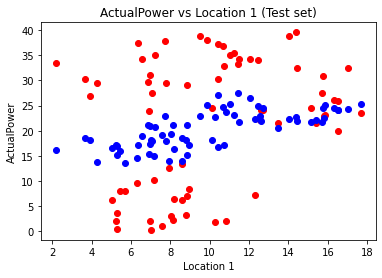

In [117]:
# Visualising the Test set results
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], omr.predict(X_test[:, 0:4]), 'bo')
plt.title('ActualPower vs Location 1 (Test set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

## Regression Tree & Random Forest

In [131]:
# Fitting Tree to the Training set (Location 1)
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 1:2], y_train)

In [132]:
# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 1:2])

In [133]:
# Coefficient of determination R^2
r2 = (sdt.score(X_train[:, 1:2], y_train), sdt.score(X_test[:, 1:2], y_test))
print(f"For Location 1 r2 = {r2}")

For Location 1 r2 = (0.11815206897979558, 0.08292424988205249)


In [134]:
# Fitting Tree to the Training set (MaxCapacity)
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 0:1], y_train)

# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 0:1])

# Coefficient of determination R^2
r2 = (sdt.score(X_train[:, 0:1], y_train), sdt.score(X_test[:, 0:1], y_test))
print(f"For MaxCapacity r2 = {r2}")

For MaxCapacity r2 = (0.012361222860595933, -0.0338804583810739)


In [135]:
# Fitting Tree to the Training set (Location 4)
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 2:3], y_train)

# Predicting the Test set results
y_pred = sdt.predict(X_test[:,2:3])

# Coefficient of determination R^2
r2 = (sdt.score(X_train[:, 2:3], y_train), sdt.score(X_test[:, 2:3], y_test))
print(f"For Location 4 r2 = {r2}")

For Location 4 r2 = (0.2798805146307243, 0.15844420625327327)


In [136]:
# Fitting Tree to the Training set (Location 5)
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 3:4], y_train)

# Predicting the Test set results
y_pred = sdt.predict(X_test[:, 3:4])

# Coefficient of determination R^2
r2 = (sdt.score(X_train[:, 3:4], y_train), sdt.score(X_test[:, 3:4], y_test))
print(f"For Location 5 r2 = {r2}")

For Location 5 r2 = (0.39045230908331885, -0.05254532334840545)


Исходя из R^2 ни одна из моделей не подходит для прогнозирования.

In [137]:
# Mean squared error
mean_squared_error(y_train, sdt.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(106.64157998791202, 171.1706799417286)

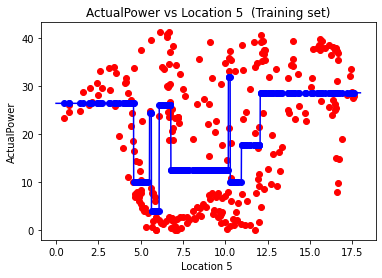

In [138]:
# Visualising the Training set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,3], y_train, color = 'red')
plt.plot(X_train[:,3], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('ActualPower vs Location 5  (Training set)')
plt.xlabel('Location 5 ')
plt.ylabel('ActualPower')
plt.show()

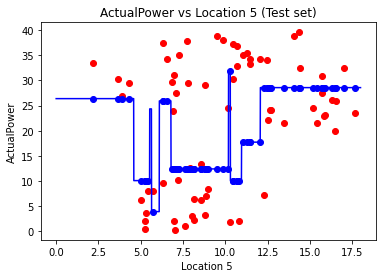

In [139]:
# Visualising the Test set results
X_grid = np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,3], y_test, color = 'red')
plt.plot(X_test[:,3], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('ActualPower vs Location 5 (Test set)')
plt.xlabel('Location 5 ')
plt.ylabel('ActualPower')
plt.show()

### Random Forest

In [153]:
# Fitting Random Forest to the Training set
rf = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [154]:
# Predicting the Test set results
y_pred = rf.predict(X_test)

# Coefficient of determination R^2
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.8609475559528259, 0.5885741186947391)

R^2 для тренировочной выборки показал отличный результат, для тестовой - значение немного меньше за 0,6.
Это говорит о том, что на данный момент именно модель Random Forest лучше всего подходит для целей прогнозирования этой выборки данных.

In [155]:
# Mean squared error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(24.327501449592596, 66.90832811323529)

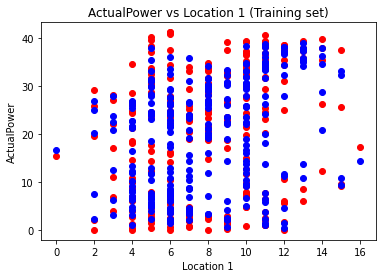

In [156]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], rf.predict(X_train), 'bo')
plt.title('ActualPower vs Location 1 (Training set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

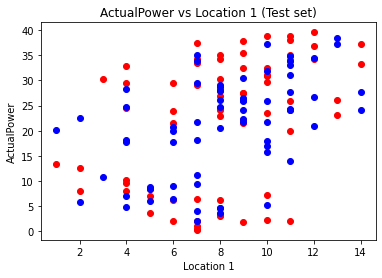

In [157]:
# Visualising the Test set results
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], rf.predict(X_test), 'bo')
plt.title('ActualPower vs Location 1 (Test set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

## Regression Neural Network

In [159]:
# Feature Scaling
sc = StandardScaler()
dfsc = sc.fit_transform(df)
df['ActualPower'] = dfsc[:,0]
df['Max Capacity'] = dfsc[:,1]
df['Location 1'] = dfsc[:,2]
df['Location 2'] = dfsc[:,3]
df['Location 4'] = dfsc[:,4]
df['Location 5'] = dfsc[:,5]

In [160]:
df

,ActualPower,Max Capacity,Location 1,Location 2,Location 4,Location 5
0,-1.239557,0.469272,-0.622071,-0.125768,0.101909,0.124568
1,-1.262345,0.469272,-0.950089,-0.125768,0.079358,0.481382
2,-1.219048,0.469272,-1.278108,-0.125768,0.049209,0.481382
3,-1.004918,0.469272,-1.278108,-0.125768,0.008274,0.481382
4,-0.934731,0.469272,-0.950089,-0.125768,-0.041240,0.481382
...,...,...,...,...,...,...
333,0.396157,0.469272,-0.294052,-0.603405,-0.625115,-1.302688
334,0.096724,0.469272,0.033966,-0.603405,-0.615800,-1.302688
335,-0.102670,0.469272,0.033966,-0.603405,-0.618006,-1.302688
336,0.049478,0.469272,0.033966,-0.842224,-0.630262,-1.302688


In [162]:
# Cheking correlations
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,ActualPower,Max Capacity,Location 1,Location 2,Location 4,Location 5
ActualPower,1.000000,-0.099136,0.297014,0.268269,0.256173,0.113401
Max Capacity,-0.099136,1.000000,-0.429784,-0.429683,-0.422071,-0.398832
Location 1,0.297014,-0.429784,1.000000,0.639311,0.648041,0.580977
Location 2,0.268269,-0.429683,0.639311,1.000000,0.992052,0.911672
Location 4,0.256173,-0.422071,0.648041,0.992052,1.000000,0.937005
Location 5,0.113401,-0.398832,0.580977,0.911672,0.937005,1.000000


In [181]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:6].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [182]:
# Initialising the ANN
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 6, activation = 'tanh', input_dim = 5))

# Adding the second hidden layer
rnn.add(Dense(units = 6, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [183]:
# Fitting the ANN to the Training set
rnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
27/27 [==============================] - 0s 937us/step - loss: 0.9373 - accuracy: 0.0000e+00
Epoch 2/100
27/27 [==============================] - 0s 1ms/step - loss: 0.9199 - accuracy: 0.0000e+00
Epoch 3/100
27/27 [==============================] - 0s 1ms/step - loss: 0.9092 - accuracy: 0.0000e+00
Epoch 4/100
27/27 [==============================] - 0s 1ms/step - loss: 0.9023 - accuracy: 0.0000e+00
Epoch 5/100
27/27 [==============================] - 0s 1ms/step - loss: 0.8963 - accuracy: 0.0000e+00
Epoch 6/100
27/27 [==============================] - 0s 1ms/step - loss: 0.8915 - accuracy: 0.0000e+00
Epoch 7/100
27/27 [==============================] - 0s 951us/step - loss: 0.8908 - accuracy: 0.0000e+00
Epoch 8/100
27/27 [==============================] - 0s 812us/step - loss: 0.8821 - accuracy: 0.0000e+00
Epoch 9/100
27/27 [==============================] - 0s 2ms/step - loss: 0.8776 - accuracy: 0.0000e+00
Epoch 10/100
27/27 [==============================] - 0s 1ms/step -

In [184]:
# Predicting the Test set results
y_pred = rnn.predict(X_test)

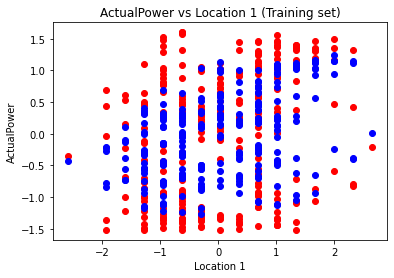

In [185]:
# Visualising the Training set results
plt.scatter(X_train[:,1], y_train, color = 'red')
plt.plot(X_train[:,1], rnn.predict(X_train), 'bo')
plt.title('ActualPower vs Location 1 (Training set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

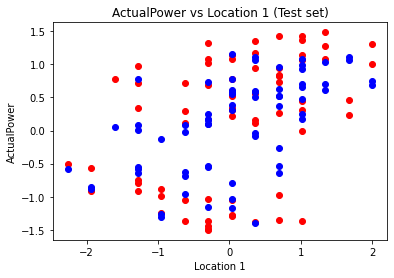

In [186]:
# Visualising the Test set results
plt.scatter(X_test[:,1], y_test, color = 'red')
plt.plot(X_test[:,1], rnn.predict(X_test), 'bo')
plt.title('ActualPower vs Location 1 (Test set)')
plt.xlabel('Location 1')
plt.ylabel('ActualPower')
plt.show()

In [191]:
train_mse_nn = sum((y_train-rnn.predict(X_train))**2)/len(y_train)
train_mse_nn

array([2.03596252, 0.42115171, 2.15799916, 0.40279542, 0.94599067,
       1.07830781, 0.42068653, 1.2598147 , 2.58355487, 1.24985008,
       1.53688343, 2.44665471, 1.16994849, 0.44868573, 0.43750575,
       1.89001147, 2.05134273, 1.54481381, 0.82154317, 0.97748886,
       2.460344  , 0.81155877, 2.11477668, 0.53406456, 2.62869146,
       1.38692683, 1.26163174, 0.45626691, 0.70227614, 0.66900023,
       0.40659658, 0.96135595, 1.76823523, 0.404817  , 1.65490088,
       2.33479407, 0.48115675, 3.11247481, 1.67213887, 0.46140397,
       0.57537574, 1.00941012, 1.15828579, 2.57525929, 1.90711308,
       1.81281864, 1.6733212 , 1.75284382, 0.41931824, 0.53920462,
       1.8477026 , 0.55880674, 1.46395013, 0.49976318, 0.40384463,
       0.92029086, 2.99569349, 2.44142249, 3.00181447, 2.21053595,
       0.51938695, 1.11682639, 2.33692769, 2.19119565, 0.81019774,
       0.65176117, 0.92445777, 0.60499252, 1.3550644 , 0.54289506,
       2.20994294, 0.63458214, 2.41010176, 2.47390296, 2.72192

In [198]:
y_pred_train = rnn.predict(X_train)
y_pred_test = rnn.predict(X_test)
train_mse_nn = sum((y_train - y_pred_train) ** 2 for y_train, y_pred_train in zip(y_train, y_pred_train)) / len(y_train)
test_mse_nn = sum((y_test - y_pred_test) ** 2 for y_test, y_pred_test in zip(y_test, y_pred_test)) / len(y_test)
print(f"train_mse_nn: {train_mse_nn}, test_mse_nn: {test_mse_nn}")

train_mse_nn: [0.5959342], test_mse_nn: [0.53254324]


### ВЫВОД: для прогнозирования данного датасета лучше всего себя показали Random Forest (r^2_test = 0.86, r^2_train = 0.589) и Regression Neural Network. Но учитывая SME, который для Random Forest равен (train = 106.64, test = 171.17) и для RNN - (train=0.6, test=0.53) соответственно, можно сказать, что нейронная модель подходит лучше.